# Optical Lab 2 Analysis

In [3]:
import astropy.io.fits as fits
import numpy as np
import glob
import matplotlib.pyplot as plt
import uwastro465isos
from uwastro465isos import isochrones
import optical as op
import photutils
import astropy.stats

In [5]:
%load_ext autoreload
%autoreload 2

## Demo analysis

In [8]:
!ls obsdata_demo/

bias_02_03        masterflat_g.fits ngc1637_g
g_flat            masterflat_r.fits r_flat
master_bias.fits  ngc1637_b         reduced.fits


In [10]:
!ls obsdata_demo/bias_02_03/

20240204_012528264_Bias.fits 20240204_012751949_Bias.fits
20240204_012542703_Bias.fits 20240204_012806179_Bias.fits
20240204_012557064_Bias.fits 20240204_012820721_Bias.fits
20240204_012611500_Bias.fits 20240204_012834961_Bias.fits
20240204_012625945_Bias.fits 20240204_012849292_Bias.fits
20240204_012640182_Bias.fits 20240204_012903523_Bias.fits
20240204_012654512_Bias.fits 20240204_012918161_Bias.fits
20240204_012708849_Bias.fits 20240204_012932399_Bias.fits
20240204_012723286_Bias.fits 20240204_012946838_Bias.fits
20240204_012737510_Bias.fits


In [12]:
# glob.glob returns a list with all the strings that match the pattern specified
bias_filename_list = glob.glob("obsdata_demo/bias_02_03/*.fits")
bias_filename_list

['obsdata_demo/bias_02_03/20240204_012723286_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012611500_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012751949_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012557064_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012528264_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012932399_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012946838_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012737510_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012542703_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012903523_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012806179_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012918161_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012849292_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012834961_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012625945_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012708849_Bias.fits',
 'obsdata_demo/bias_02_03/20240204_012654512_Bias.fits',
 'obsdata_demo/bias_02_03/20240

In [14]:
bias_stack = []

for filename in bias_filename_list:
    print(filename)
    hdulist = fits.open(filename)
    image = hdulist[0].data.astype(float)
    bias_stack.append(image)

obsdata_demo/bias_02_03/20240204_012723286_Bias.fits
obsdata_demo/bias_02_03/20240204_012611500_Bias.fits
obsdata_demo/bias_02_03/20240204_012751949_Bias.fits
obsdata_demo/bias_02_03/20240204_012557064_Bias.fits
obsdata_demo/bias_02_03/20240204_012528264_Bias.fits
obsdata_demo/bias_02_03/20240204_012932399_Bias.fits
obsdata_demo/bias_02_03/20240204_012946838_Bias.fits
obsdata_demo/bias_02_03/20240204_012737510_Bias.fits
obsdata_demo/bias_02_03/20240204_012542703_Bias.fits
obsdata_demo/bias_02_03/20240204_012903523_Bias.fits
obsdata_demo/bias_02_03/20240204_012806179_Bias.fits
obsdata_demo/bias_02_03/20240204_012918161_Bias.fits
obsdata_demo/bias_02_03/20240204_012849292_Bias.fits
obsdata_demo/bias_02_03/20240204_012834961_Bias.fits
obsdata_demo/bias_02_03/20240204_012625945_Bias.fits
obsdata_demo/bias_02_03/20240204_012708849_Bias.fits
obsdata_demo/bias_02_03/20240204_012654512_Bias.fits
obsdata_demo/bias_02_03/20240204_012820721_Bias.fits
obsdata_demo/bias_02_03/20240204_012640182_Bia

In [16]:
print(len(bias_stack))

19


In [18]:
# (z,x,y) - the way it is printed

bias_stack = np.array(bias_stack)
print(bias_stack.shape)

(19, 2504, 3326)


In [20]:
# because of outliers being the case, using median is a much better choice than mean
master_bias = np.median(bias_stack, axis = 0)
print(master_bias.shape)

(2504, 3326)


In [22]:
# we basically compressed the dimension with 19 values into 1

In [24]:
fits.PrimaryHDU(data = master_bias).writeto("obsdata_demo/master_bias.fits", overwrite = True)

In [26]:
def make_master_flat(glob_string):

    filename_list = glob.glob(glob_string)
    stack = []

    for filename in filename_list:
        print(filename)
        hdulist = fits.open(filename)
        
        # load the image from file
        image = hdulist[0].data.astype(float)
        
        # subtract bias
        image = image - master_bias

        # normalize flat-fields - if you dont, you cannot use the median here
        mean_level = np.mean(image)
        image = image / mean_level
        
        stack.append(image)

    stack = np.array(stack)
    combined = np.median(stack, axis = 0)
    
    return combined

In [28]:
master_flat_g = make_master_flat("obsdata_demo/g_flat/*.fits")
fits.PrimaryHDU(data = master_flat_g).writeto("obsdata_demo/masterflat_g.fits", overwrite = True)

obsdata_demo/g_flat/20240204_014443_Flat_Green.fits
obsdata_demo/g_flat/20240204_014426_Flat_Green.fits
obsdata_demo/g_flat/20240204_014535_Flat_Green.fits
obsdata_demo/g_flat/20240204_014501_Flat_Green.fits
obsdata_demo/g_flat/20240204_014518_Flat_Green.fits


In [30]:
master_flat_r = make_master_flat("obsdata_demo/r_flat/*.fits")
fits.PrimaryHDU(data = master_flat_r).writeto("obsdata_demo/masterflat_r.fits", overwrite = True)

obsdata_demo/r_flat/20240204_014929_Flat_Red.fits
obsdata_demo/r_flat/20240204_014754_Flat_Red.fits
obsdata_demo/r_flat/20240204_014818_Flat_Red.fits
obsdata_demo/r_flat/20240204_014905_Flat_Red.fits
obsdata_demo/r_flat/20240204_014841_Flat_Red.fits


In [31]:
def reduce_image(filename, flatfield):
    hdulist = fits.open(filename)
    image = hdulist[0].data.astype(float)
    
    # subtract bias
    image = image - master_bias
    
    # divide by flat fields
    image = image / flatfield
    
    return image

In [34]:
reduced_image = reduce_image("obsdata_demo/ngc1637_g/20240204_031452_ngc1637-g_Green.fits", master_flat_g)
fits.PrimaryHDU(data = reduced_image).writeto("obsdata_demo/reduced.fits", overwrite = True)

In [36]:
iso = isochrones.Isochrone_Sloan()

/opt/anaconda3/lib/python3.12/site-packages/uwastro465isos/isochrones.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  self.iso = pandas.read_csv(self.filename, delim_whitespace=True, comment='#', )


In [38]:
# it is the log of ages, not the ages itself - very wide range
iso.get_list_of_ages()

array([ 6.6 ,  6.65,  6.7 ,  6.75,  6.8 ,  6.85,  6.9 ,  6.95,  7.  ,
        7.05,  7.1 ,  7.15,  7.2 ,  7.25,  7.3 ,  7.35,  7.4 ,  7.45,
        7.5 ,  7.55,  7.6 ,  7.65,  7.7 ,  7.75,  7.8 ,  7.85,  7.9 ,
        7.95,  8.  ,  8.05,  8.1 ,  8.15,  8.2 ,  8.25,  8.3 ,  8.35,
        8.4 ,  8.45,  8.5 ,  8.55,  8.6 ,  8.65,  8.7 ,  8.75,  8.8 ,
        8.85,  8.9 ,  8.95,  9.  ,  9.05,  9.1 ,  9.15,  9.2 ,  9.25,
        9.3 ,  9.35,  9.4 ,  9.45,  9.5 ,  9.55,  9.6 ,  9.65,  9.7 ,
        9.75,  9.8 ,  9.85,  9.9 ,  9.95, 10.  , 10.05, 10.1 ])

In [40]:
# measure the iron content relative to the iron content of the sun
# -2 is metal poor
# 0 is equal to the sun's mettalicity
iso.get_list_of_metallicities()

array([-2. , -1.5, -1. , -0.5,  0. ])

In [42]:
# mbolmag - absolute bolomentric magnitude
iso.get_list_of_magnitudes()

['mbolmag', 'umag', 'gmag', 'rmag', 'imag', 'zmag']

In [44]:
iso1 = iso.select_isochrone(log_age = 9.5, metallicity=0)

In [46]:
# isochrones - stars with different masses at the same time during their stellar evolution - which means they will have the same age

(15.0, -5.0)

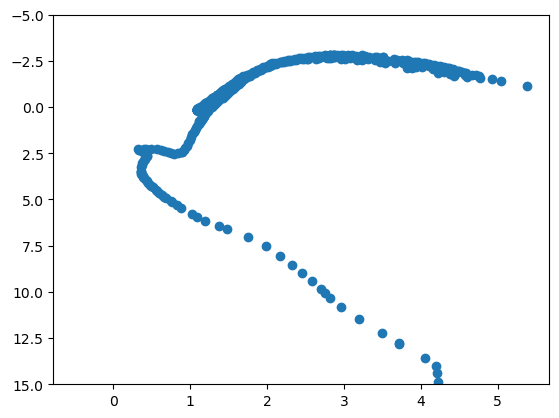

In [48]:
# if you have something that is close to 30, it indicates that the star has already died
fig, ax = plt.subplots()
ax.scatter(iso1['gmag'] - iso1['imag'], iso1['imag'])
# you can invert the axis
ax.set_ylim(15, -5)

(-1.0, 5.0)

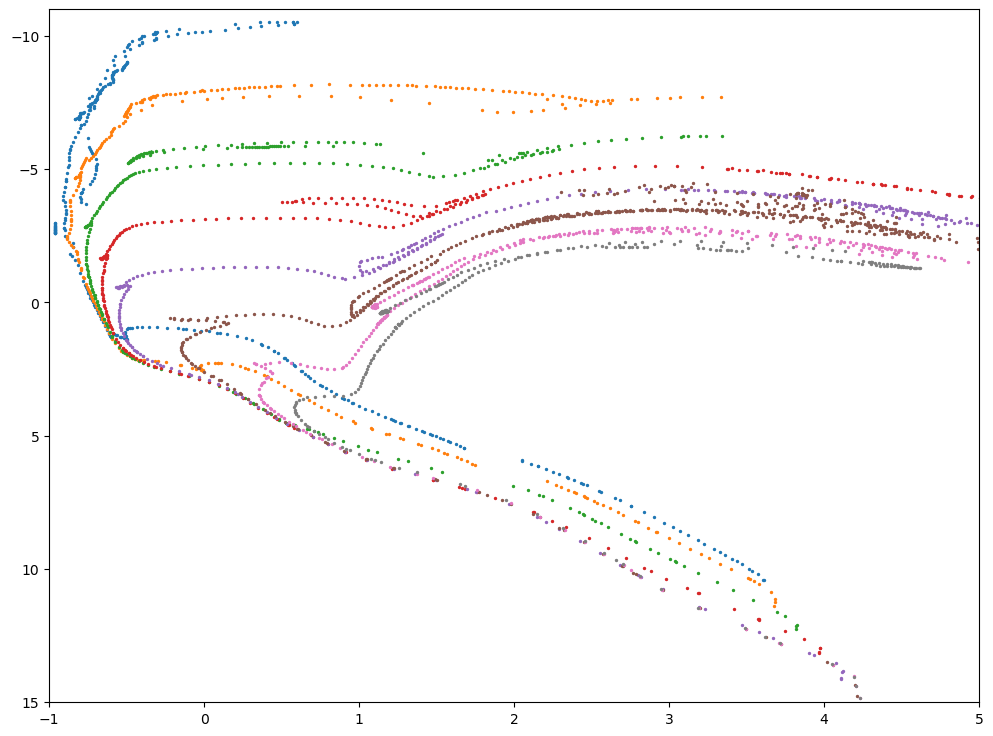

In [50]:
# shape tells you what the age is
# shifting up and down means how far it is from you
# shifting left and right means how much dust is there between you and the cluster
fig, ax = plt.subplots(figsize = (12,9))
for age in [6.6, 7, 7.5, 8, 8.5, 9, 9.5, 10]:
    iso1 = iso.select_isochrone(age, 0)
    ax.scatter(iso1['gmag'] - iso1['imag'], iso1['imag'], s=2)
ax.set_ylim(15, -11)
ax.set_xlim(-1,5)

## Analysis Section for Optical Lab 2

### part 1 - organize your files

In [54]:
!ls

Astronomy_Optical_Lab_2_Report.pdf masterflat_g.fits
Lab2_Optical.ipynb                 masterflat_i.fits
__pycache__                        masterflat_r.fits
bias_raw.png                       ngc1528
dark                               obsdata_demo
flat_g                             old
flat_i                             optical.py
flat_r                             r_flat_raw.png
flat_z                             reduced_science_g.fits
g_flat_raw.png                     reduced_science_g.png
i_flat_raw.png                     reduced_science_i.fits
master_bias.png                    reduced_science_i.png
master_bias_median.fits            reduced_science_r.fits
master_flat_g.png                  reduced_science_r.png
master_flat_i.png                  science_raw.png
master_flat_r.png


In [56]:
!ls dark/

Dark_20231109_231805.fits Dark_20231109_232453.fits Dark_20231109_233141.fits
Dark_20231109_232129.fits Dark_20231109_232817.fits Dark_20231109_233505.fits


In [58]:
!ls flat_g/

g_flat_g_20231113_063301.fits g_flat_g_20231113_063434.fits
g_flat_g_20231113_063333.fits g_flat_g_20231113_063504.fits
g_flat_g_20231113_063404.fits


In [60]:
!ls flat_i/

i_flat_i_20231113_064446.fits i_flat_i_20231113_064602.fits
i_flat_i_20231113_064510.fits i_flat_i_20231113_064627.fits
i_flat_i_20231113_064536.fits


In [62]:
!ls flat_r/

r_flat_r_20231113_064018.fits r_flat_r_20231113_064145.fits
r_flat_r_20231113_064053.fits r_flat_r_20231113_064210.fits
r_flat_r_20231113_064120.fits


In [64]:
!ls ngc1528/ngc1528_g

wj_NGC1528_g_g_20231113_040800_wcscal.fits
wj_NGC1528_g_g_20231113_040925_wcscal.fits
wj_NGC1528_g_g_20231113_041051_wcscal.fits
wj_NGC1528_g_g_20231113_041216_wcscal.fits
wj_NGC1528_g_g_20231113_041342_wcscal.fits
wj_NGC1528_g_g_20231113_041506_wcscal.fits


In [66]:
!ls ngc1528/ngc1528_i

wj_NGC1528_i_i_20231113_045811_wcscal.fits
wj_NGC1528_i_i_20231113_045935_wcscal.fits
wj_NGC1528_i_i_20231113_050059_wcscal.fits
wj_NGC1528_i_i_20231113_050223_wcscal.fits
wj_NGC1528_i_i_20231113_050346_wcscal.fits
wj_NGC1528_i_i_20231113_050510_wcscal.fits


In [68]:
!ls ngc1528/ngc1528_r

wj_ngc1528_r_r_20231113_042518_wcscal.fits
wj_ngc1528_r_r_20231113_042642_wcscal.fits
wj_ngc1528_r_r_20231113_042809_wcscal.fits
wj_ngc1528_r_r_20231113_042933_wcscal.fits
wj_ngc1528_r_r_20231113_043100_wcscal.fits


### part 2 - Reduce your science images using the calibration products

In [71]:
!ls

Astronomy_Optical_Lab_2_Report.pdf masterflat_g.fits
Lab2_Optical.ipynb                 masterflat_i.fits
__pycache__                        masterflat_r.fits
bias_raw.png                       ngc1528
dark                               obsdata_demo
flat_g                             old
flat_i                             optical.py
flat_r                             r_flat_raw.png
flat_z                             reduced_science_g.fits
g_flat_raw.png                     reduced_science_g.png
i_flat_raw.png                     reduced_science_i.fits
master_bias.png                    reduced_science_i.png
master_bias_median.fits            reduced_science_r.fits
master_flat_g.png                  reduced_science_r.png
master_flat_i.png                  science_raw.png
master_flat_r.png


In [73]:
master_bias = op.Reduce.make_master_bias("dark/*.fits", mean = False)
master_bias

array([[1324. , 1337.5, 1340.5, ..., 1331.5, 1330. , 1334.5],
       [1332. , 1339.5, 1336.5, ..., 1326.5, 1331.5, 1335. ],
       [1330. , 1337. , 1329.5, ..., 1330.5, 1326. , 1333. ],
       ...,
       [1333.5, 1327.5, 1325. , ..., 1336.5, 1326. , 1332. ],
       [1330. , 1333.5, 1325. , ..., 1334.5, 1332.5, 1326.5],
       [1326. , 1328. , 1335.5, ..., 1329.5, 1331.5, 1328. ]])

In [75]:
master_flat_g = op.Reduce.make_master_flat_field("flat_g/*.fits", master_bias, g = True, i = False)
master_flat_g

array([[0.99741731, 0.96339693, 0.95952227, ..., 0.99888065, 0.99384197,
        0.99775978],
       [0.99650276, 0.95545624, 0.95529892, ..., 0.99711928, 0.99755019,
        0.9917604 ],
       [0.99140201, 0.96674853, 0.96054076, ..., 1.00634198, 0.99112129,
        0.9952518 ],
       ...,
       [1.00834511, 0.99335634, 0.98398313, ..., 1.01287153, 1.01339199,
        1.01601384],
       [1.00776363, 0.99352475, 0.98524794, ..., 1.01956691, 1.00874613,
        1.01672643],
       [1.00910865, 0.98356383, 0.97930536, ..., 1.00002152, 1.01495713,
        1.02094295]])

In [77]:
master_flat_r = op.Reduce.make_master_flat_field("flat_r/*.fits", master_bias, g = False, i = False)
master_flat_r

array([[0.99356255, 0.95418842, 0.9619798 , ..., 0.98219263, 0.99173803,
        0.99139462],
       [0.99326394, 0.95079536, 0.95637448, ..., 0.98488083, 0.98854254,
        0.9894996 ],
       [0.97990158, 0.95788059, 0.95726948, ..., 0.98542695, 0.98099667,
        0.98051757],
       ...,
       [1.0009992 , 0.98149364, 0.98471886, ..., 1.00747031, 0.99920257,
        1.00772566],
       [0.99930523, 0.98702038, 0.9854357 , ..., 0.99802192, 1.00601035,
        0.99925254],
       [0.99152733, 0.98255446, 0.98148054, ..., 0.99907934, 1.00616751,
        0.99855236]])

In [79]:
master_flat_i = op.Reduce.make_master_flat_field("flat_i/*.fits", master_bias, g = False, i = True)
master_flat_i

array([[0.99109272, 0.95316722, 0.95275694, ..., 0.98577504, 0.98977017,
        0.99219917],
       [0.99374769, 0.94788974, 0.94986058, ..., 0.9787894 , 0.9859492 ,
        0.97823037],
       [0.98684862, 0.95227456, 0.95467249, ..., 0.98799843, 0.98073463,
        0.9805124 ],
       ...,
       [0.97991199, 0.96207163, 0.96754574, ..., 0.99346119, 0.98041958,
        0.98927615],
       [0.98040867, 0.96548746, 0.96692013, ..., 0.98699544, 0.98644222,
        0.98047209],
       [0.97894581, 0.96525183, 0.95553744, ..., 0.98083876, 0.988063  ,
        0.98528544]])

In [81]:
# using only one science image to reduce that image and use it for further analysis

In [83]:
# science image for g filter

ngc1528_g = op.Reduce.reduce_science_image("ngc1528/ngc1528_g/wj_NGC1528_g_g_20231113_040800_wcscal.fits", master_bias,master_flat_g)
ngc1528_g
fits.PrimaryHDU(data = ngc1528_g).writeto("reduced_science_g.fits", overwrite = True)

In [85]:
# science image for r filter

ngc1528_r = op.Reduce.reduce_science_image('ngc1528/ngc1528_r/wj_ngc1528_r_r_20231113_042518_wcscal.fits', master_bias,master_flat_r)
ngc1528_r
fits.PrimaryHDU(data = ngc1528_r).writeto("reduced_science_r.fits", overwrite = True)

In [87]:
# science image for i filter

ngc1528_i = op.Reduce.reduce_science_image('ngc1528/ngc1528_i/wj_NGC1528_i_i_20231113_045811_wcscal.fits', master_bias,master_flat_i)
ngc1528_i
fits.PrimaryHDU(data = ngc1528_i).writeto("reduced_science_i.fits", overwrite = True)

In [89]:
background_sub_g, std_g , background_g = op.Extract.estimate_background(ngc1528_g)
background_sub_g

array([[ -7.40399263,  -3.41536647, -16.5509094 , ..., -13.05409634,
          5.02382904, -26.9814996 ],
       [ -3.29978121,  -6.75212375,   5.82567767, ...,  -8.87895902,
          0.10133735,  17.35583083],
       [-10.84253111,   3.98813496, -16.64539138, ...,  -8.77219847,
         14.40827946, -14.22360414],
       ...,
       [  4.91946944,  30.74848526,  27.47461154, ..., -24.20615825,
         34.46571535,  -5.26541841],
       [  4.48712436, -12.55488758, -11.26526874, ...,  -5.12486954,
        -10.98576506, -12.71239564],
       [  6.32226166, -18.22062035,   5.13506613, ...,  15.83963302,
        -24.37353075,  18.7370536 ]])

In [91]:
background_sub_r, std_r, background_r = op.Extract.estimate_background(ngc1528_r)
background_sub_r

array([[ -9.8411024 ,   0.6673064 , -14.6966341 , ...,   5.95872995,
         -2.61799108,   4.9806402 ],
       [-11.82773595,   8.38673298, -16.29131413, ..., -11.58986261,
          8.31661465, -17.55818963],
       [ 15.89995576,  10.19925634, -13.23511915, ...,  -9.60895967,
         -1.55808861,  -4.56988083],
       ...,
       [  0.98193252,  19.2788953 ,  21.42892763, ..., -19.51464889,
         26.68280872, -16.0617278 ],
       [ 11.65942489, -15.83284714,  10.17844462, ..., -28.77801695,
         21.35635738,  39.18585293],
       [ 30.68456576,  -0.69548428,  15.20500347, ..., -19.84448781,
          9.41104953,  -6.28292191]])

In [93]:
background_sub_i, std_i, background_i = op.Extract.estimate_background(ngc1528_i)
background_sub_i

array([[  5.3571387 ,   3.29635534,  17.99574985, ...,   5.94055432,
          3.3553428 , -26.40627171],
       [  2.30052413,   1.25357881,   3.33835601, ...,   0.93718329,
        -10.29006051,  12.69865207],
       [  4.40456237,  -1.41786281,   6.41977087, ...,   7.93174753,
          5.50632944, -16.92768328],
       ...,
       [-12.3404333 , -10.32781942,  -0.50034101, ...,   4.82017097,
          2.45100227, -17.8662448 ],
       [ -2.64878702,  -1.00058719,   5.71027826, ...,  -0.15668873,
         -8.26181189,  13.15952831],
       [  1.44638611,  12.98729664,  -4.05929235, ...,   7.03411725,
         12.99106212,   2.39559346]])

In [101]:
sources_g = op.Extract.detect_source(background_sub_g, std_g, 5.0)

In [103]:
sources_r = op.Extract.detect_source(background_sub_r, std_r, 5.0)

In [104]:
sources_i = op.Extract.detect_source(background_sub_i, std_i, 5.0)

In [107]:
source_flux_g = op.Extract.estimate_source_fluxes(sources_g,background_sub_g)

/Users/riyakore/Desktop/Astronomy/Astron_465/Optical Lab 2/optical.py:133: RuntimeWarning: invalid value encountered in log10
  sources['mag'] = -2.5*np.log10(sources['aperture_sum'])


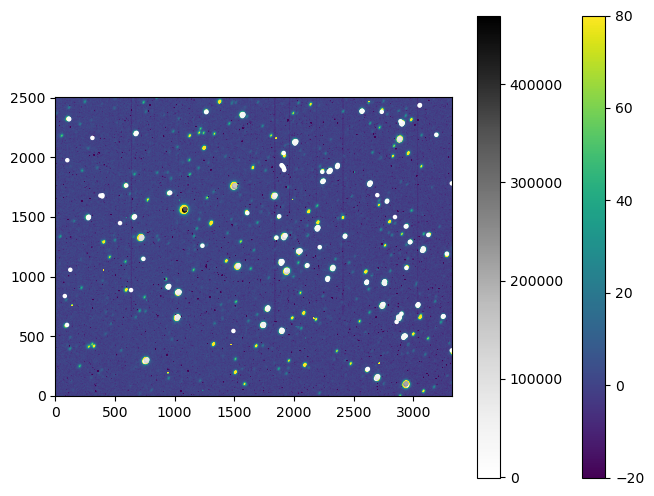

In [109]:
# sources_g = op.Extract.detect_source(background_sub_g, std_g, 5.0)
# ngc1528_g

fig, ax = plt.subplots(figsize = (8,6))
cb = ax.imshow(background_sub_g, vmin = -20, vmax = 80, origin = 'lower', cmap = 'viridis')
fig.colorbar(cb)
cb1 = ax.scatter(sources_g['xcentroid'], sources_g['ycentroid'], c = sources_g['flux'], s = 5, cmap = 'Greys')
fig.colorbar(cb1)

In [111]:
source_flux_r = op.Extract.estimate_source_fluxes(sources_r,background_sub_r)

/Users/riyakore/Desktop/Astronomy/Astron_465/Optical Lab 2/optical.py:133: RuntimeWarning: invalid value encountered in log10
  sources['mag'] = -2.5*np.log10(sources['aperture_sum'])


In [113]:
source_flux_i = op.Extract.estimate_source_fluxes(sources_i,background_sub_i)

/Users/riyakore/Desktop/Astronomy/Astron_465/Optical Lab 2/optical.py:133: RuntimeWarning: invalid value encountered in log10
  sources['mag'] = -2.5*np.log10(sources['aperture_sum'])


In [115]:
noise_g = op.Extract.get_flux_uncertainties(source_flux_g, background_g)

In [117]:
noise_r = op.Extract.get_flux_uncertainties(source_flux_r, background_r)

In [119]:
noise_i = op.Extract.get_flux_uncertainties(source_flux_i, background_i)

In [121]:
print(len(source_flux_i), len(noise_i))

491 491


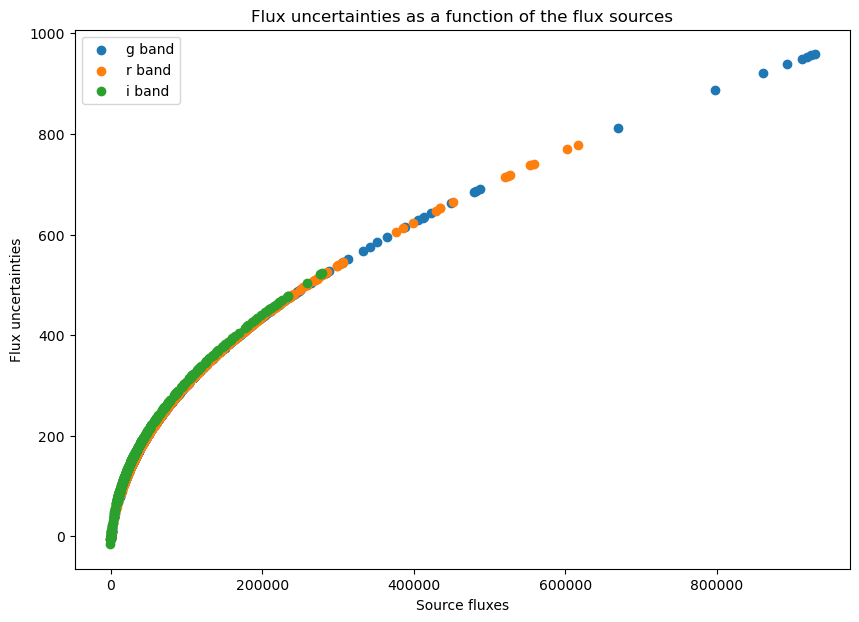

In [125]:
plt.figure(figsize = (10,7))
# plt.hist(source_flux_g / noise_g ,label = 'g band')
plt.scatter (source_flux_g, source_flux_g / noise_g, label = 'g band')
plt.scatter (source_flux_r, source_flux_r/ noise_r, label = 'r band')
plt.scatter(source_flux_i, source_flux_i / noise_i, label = 'i band')
plt.xlabel("Source fluxes")
plt.ylabel("Flux uncertainties")
plt.title("Flux uncertainties as a function of the flux sources")
plt.legend()
plt.show()

## Extra part for the lab report

In [128]:
hdulist = fits.open('/Users/riyakore/Desktop/Astronomy/Astron_465/Optical Lab 2/dark/Dark_20231109_232453.fits')
image = hdulist[0].data.astype(float)
print(np.mean(image), np.std(image))
hdulist.close()

1324.5051807666964 70.13369165889847


In [130]:
1324.5051807666964 - 70.13369165889847

1254.371489107798

In [132]:
1324.5051807666964 + 70.13369165889847

1394.6388724255949

In [134]:
# fig, ax = plt.subplots(figsize = (15,10))
# cb = ax.imshow(ngc1528_g, vmin = 1, vmax = 1 ,origin = 'lower', cmap = 'inferno')
# fig.colorbar(cb)
# plt.show()

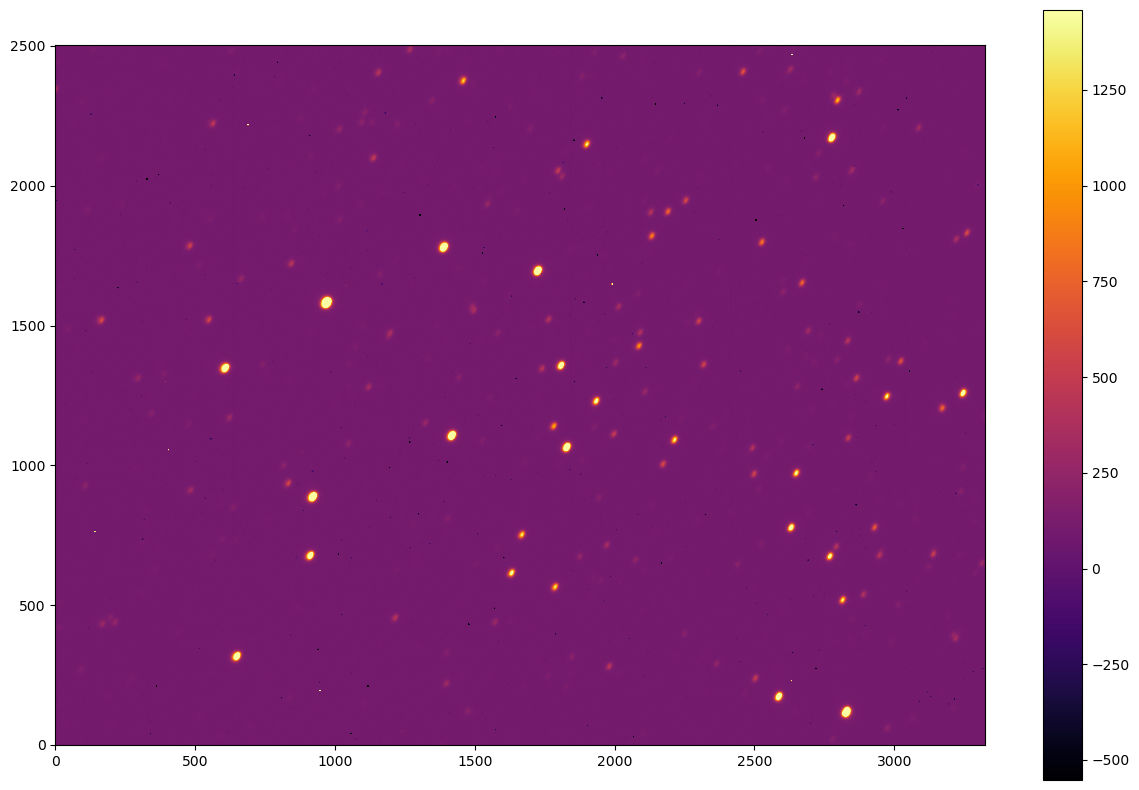

In [136]:
# for flats
file_name = '/Users/riyakore/Desktop/Astronomy/Astron_465/Optical Lab 2/reduced_science_r.fits'
hdulist = fits.open(file_name)
image = hdulist[0].data.astype(float)
fig, ax = plt.subplots(figsize = (15,10))
cb = ax.imshow(image, vmin = -552.2958093294874, vmax = 1458.7479188805446,origin = 'lower', cmap = 'inferno')
fig.colorbar(cb)
plt.show()
hdulist.close()

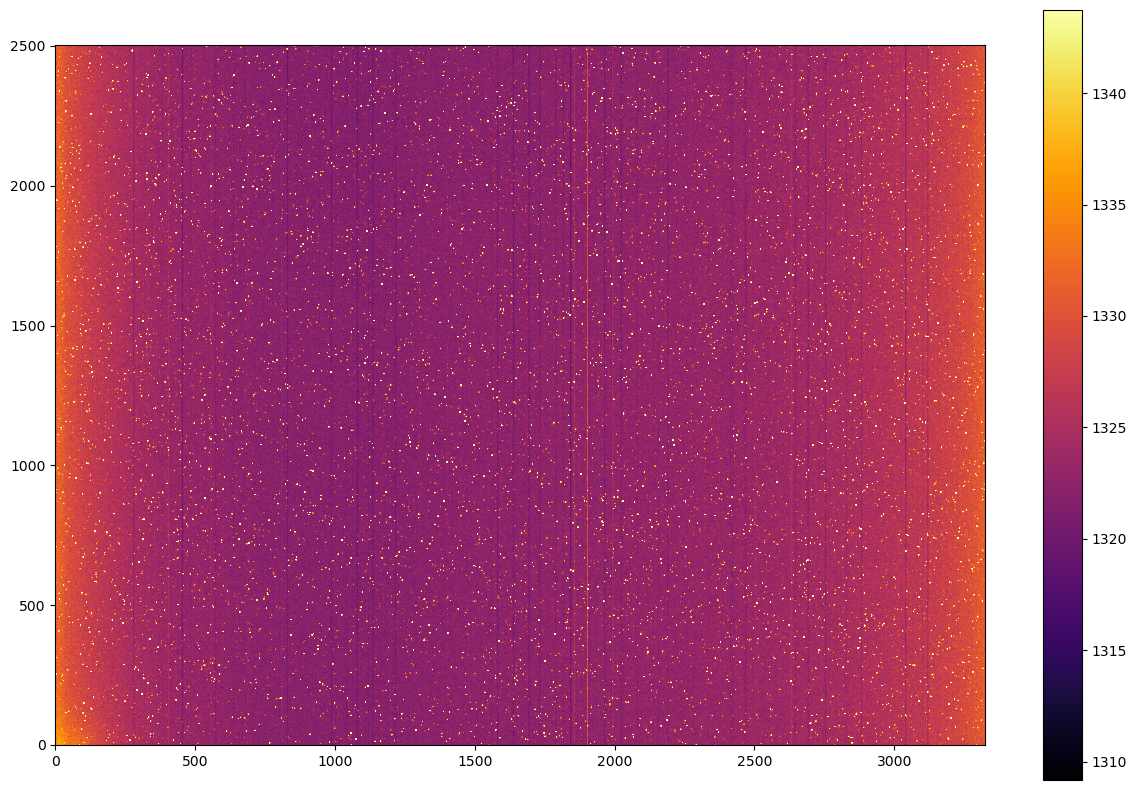

In [138]:
# for bias
file_name = '/Users/riyakore/Desktop/Astronomy/Astron_465/Optical Lab 2/master_bias_median.fits'
hdulist = fits.open(file_name)
image = hdulist[0].data.astype(float)
fig, ax = plt.subplots(figsize = (15,10))
cb = ax.imshow(image, vmin = 1309.1721705036377, vmax = 1343.7315487517262, origin = 'lower', cmap = 'inferno')
fig.colorbar(cb)
plt.show()
hdulist.close()